In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier

In [182]:
# 指定されたパスからデータを読み込んでDataFrameを生成する
def load_datafile(path):
    df = pd.read_csv(path)
    df = df.replace("male",0).replace("female",1)
    df = df.replace("C", 0).replace("Q", 1).replace("S", 2)
    #欠損値を補完
    df["Age"].fillna(df.Age.median(), inplace=True)
    df["Fare"].fillna(df.Fare.median(), inplace=True)
    ### 家族数を属性に追加する
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    df = df.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1)
    return df

In [183]:
# データを読み込む
dataPath = '~/desk/kaggle/ktProj/data/'
df = load_datafile(dataPath + "train.csv")

In [184]:

# 学習データを作成(欠損値を含む行は削除)
#train_data = df2.values[~pd.isnull(df2.values).any(axis=1)]
train_data = df.values[~np.isnan(df.values).any(axis=1)]

# トレーニングデータとテストデータに分割する
x_data = train_data[:, 2:]
y_data = train_data[:, 1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, stratify=y_data, random_state=42)
n_features = x_data.shape[1]
    
print("shape train data: {}".format(train_data.shape))
print("shape x data: {}".format(x_data.shape))
print("shape y data: {}".format(y_data.shape))
print("shape x: {}".format(x_train.shape))
print("shape y: {}".format(y_train.shape))

shape train data: (891, 9)
shape x data: (891, 7)
shape y data: (891,)
shape x: (668, 7)
shape y: (668,)


Text(0.5,0,'n_alpha')

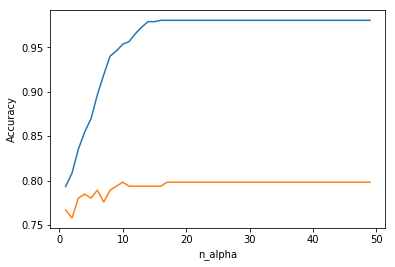

In [185]:
# ハイパーパラメータを調整

training_accuracy = []
test_accuracy= []
alpha_settings = np.arange(1, 50, 1)

for n_alpha in alpha_settings:
    rfc = RandomForestClassifier(n_estimators=100, random_state=10, max_features=n_features, max_depth=n_alpha).fit(x_train, y_train)
    training_accuracy.append(rfc.score(x_train, y_train))
    test_accuracy.append(rfc.score(x_test, y_test))

plt.plot(alpha_settings, training_accuracy, label="training accuracy")
plt.plot(alpha_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_alpha")

In [186]:
# とりあえずestimators = 100 で試してみる
forest = RandomForestClassifier(n_estimators = 100, max_features=n_features, max_depth=10)
# 学習
forest = forest.fit(x_train, y_train)

training accuracy : {} 0.952095808383
test accuracy : {} 0.793721973094


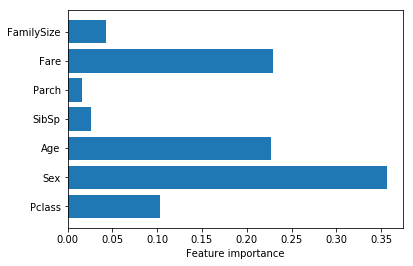

In [187]:
# トレーニングデータとテストデータに対する性能を見る
print("training accuracy : {}", forest.score(x_train, y_train))
print("test accuracy : {}", forest.score(x_test, y_test))

# 各属性の重要度を可視化してみる
def plot_feature_importance_titanic(model):
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df2.columns[2:])
    plt.xlabel("Feature importance")

plot_feature_importance_titanic(forest)

In [188]:
# 投稿データの予測を行う
test_df = load_datafile(dataPath + "test.csv")

test_data = test_df.values
xs_test = test_data[:, 1:]

output = forest.predict(xs_test)

print(len(test_data[:,0]), len(output))
zip_data = zip(test_data[:,0].astype(int), output.astype(int))
predict_data = list(zip_data)

418 418


In [189]:
# 予測結果をファイル出力
import csv
with open("predict_result_data.csv", "w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(test_data[:,0].astype(int), output.astype(int)):
        writer.writerow([pid, survived])